In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
dataset = pd.read_csv('train_data.csv')
dataset.head()

,TrainNo,TrainName,Type,Distance,Region,Day,DelayInMin,noUse
0,12004,Lucknow Swarn Shatabdi,0,0,1,1,22,12.0
1,12004,Lucknow Swarn Shatabdi,0,0,1,2,36,26.0
2,12004,Lucknow Swarn Shatabdi,0,0,1,3,32,22.0
3,12004,Lucknow Swarn Shatabdi,0,0,1,4,26,16.0
4,12004,Lucknow Swarn Shatabdi,0,0,1,5,37,27.0


In [3]:
# dataset.drop(columns=['Region'])
del dataset['noUse']
dataset

,TrainNo,TrainName,Type,Distance,Region,Day,DelayInMin
0,12004,Lucknow Swarn Shatabdi,0,0,1,1,22
1,12004,Lucknow Swarn Shatabdi,0,0,1,2,36
2,12004,Lucknow Swarn Shatabdi,0,0,1,3,32
3,12004,Lucknow Swarn Shatabdi,0,0,1,4,26
4,12004,Lucknow Swarn Shatabdi,0,0,1,5,37
...,...,...,...,...,...,...,...
449,12445,Uttar S Kranti,0,1,3,3,10
450,12445,Uttar S Kranti,0,1,3,4,5
451,12445,Uttar S Kranti,0,1,3,5,0
452,12445,Uttar S Kranti,0,1,3,6,14


In [4]:
X = dataset.iloc[:, 2:6].values
y = dataset.iloc[:, -1].values

In [5]:
X[50]

array([1, 0, 1, 2], dtype=int64)

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# encoding on region basis
ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
X[50] #first 3 are region, type, distance, day

array([1., 0., 0., 1., 0., 2.])

In [8]:
# encoding on day basis
ct2 = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct2.fit_transform(X))

In [9]:
X[50] # first 7 are days, next three are region, type, distance

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])

In [10]:
y[50]

49

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=3,n_estimators = 100, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(max_depth=3, random_state=0)

In [27]:
# Predicting a new result
x = [[0,1,3,7]]
x = [[0,0,0,0,0,0,1,0,0,1,1,1]]
regressor.predict(x)

array([38.43554282])

ValueError: x and y must be the same size

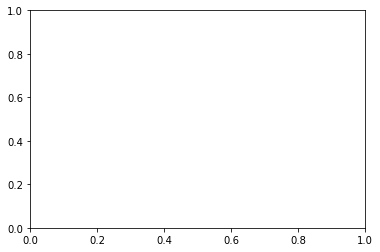

In [25]:
from sklearn.tree import plot_tree
